In [117]:
import pandas as pd
import seaborn as sns
import numpy as np

## Criando os nomes

In [118]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")

In [119]:
print(f'nomes_f tem {nomes_f.shape[0]} linhas e {nomes_f.shape[1]} colunas.\n'+
      f'nomes_m tem {nomes_m.shape[0]} linhas e {nomes_m.shape[1]} colunas.')


nomes_f tem 20 linhas e 5 colunas.
nomes_m tem 20 linhas e 5 colunas.


In [120]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
17,LUCIANA,0,429769,18,F
12,AMANDA,0,464624,13,F
15,LETICIA,0,434056,16,F
9,ALINE,0,509869,10,F


In [121]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
19,RODRIGO,0,598825,20,M
16,EDUARDO,0,628539,17,M
0,JOSE,0,5732508,1,M


In [122]:
nomes = pd.concat([nomes_f,nomes_m])['nome'].to_frame()

In [123]:
nomes.index = range(nomes.shape[0])

In [124]:
nomes.sample(5)

,nome
34,MARCELO
3,ANTONIA
7,FERNANDA
1,ANA
33,DANIEL


## Colocando ID nos alunos

In [125]:
np.random.seed(123)

In [126]:
total_alu = len(nomes)
nomes['id_aluno'] = np.random.permutation(total_alu)+1

In [127]:
dominios = ['@dominiodoemail.com.br','@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios,total_alu)


In [128]:
nomes.head()

,nome,id_aluno,dominio
0,MARIA,7,@servicodoemail.com
1,ANA,11,@dominiodoemail.com.br
2,FRANCISCA,13,@dominiodoemail.com.br
3,ANTONIA,39,@servicodoemail.com
4,ADRIANA,6,@dominiodoemail.com.br


In [129]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [130]:
nomes.head()

,nome,id_aluno,dominio,email
0,MARIA,7,@servicodoemail.com,maria@servicodoemail.com
1,ANA,11,@dominiodoemail.com.br,ana@dominiodoemail.com.br
2,FRANCISCA,13,@dominiodoemail.com.br,francisca@dominiodoemail.com.br
3,ANTONIA,39,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,6,@dominiodoemail.com.br,adriana@dominiodoemail.com.br


## Criando tabela cursos

In [131]:
!pip3 install html5lib
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
import html5lib

url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [133]:
cursos = cursos[0]

In [134]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando index de cursos

In [135]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace = True)

In [136]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [137]:
cursos['id'] = cursos.index + 1

In [138]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [139]:
cursos.set_index('id',inplace = True)

In [140]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [141]:
nomes.sample(5)

,nome,id_aluno,dominio,email
0,MARIA,7,@servicodoemail.com,maria@servicodoemail.com
5,JULIANA,12,@servicodoemail.com,juliana@servicodoemail.com
10,SANDRA,9,@servicodoemail.com,sandra@servicodoemail.com
34,MARCELO,23,@servicodoemail.com,marcelo@servicodoemail.com
13,BRUNA,8,@dominiodoemail.com.br,bruna@dominiodoemail.com.br


## Matriculando nos cursos

In [142]:
nomes.sample(5)

,nome,id_aluno,dominio,email
34,MARCELO,23,@servicodoemail.com,marcelo@servicodoemail.com
2,FRANCISCA,13,@dominiodoemail.com.br,francisca@dominiodoemail.com.br
32,RAFAEL,33,@dominiodoemail.com.br,rafael@dominiodoemail.com.br
9,ALINE,21,@dominiodoemail.com.br,aline@dominiodoemail.com.br
11,CAMILA,38,@dominiodoemail.com.br,camila@dominiodoemail.com.br


In [143]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alu) * 1.5 ).astype(int)

In [144]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
25,PAULO,28,@dominiodoemail.com.br,paulo@dominiodoemail.com.br,4
12,AMANDA,25,@servicodoemail.com,amanda@servicodoemail.com,1
18,VANESSA,22,@dominiodoemail.com.br,vanessa@dominiodoemail.com.br,2
38,RAIMUNDO,29,@dominiodoemail.com.br,raimundo@dominiodoemail.com.br,1
7,FERNANDA,2,@dominiodoemail.com.br,fernanda@dominiodoemail.com.br,3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


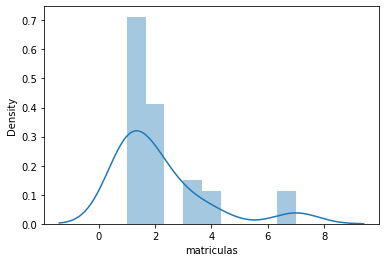

In [145]:
sns.distplot(nomes.matriculas)


In [146]:
nomes.matriculas.value_counts()

1    19
2    11
3     4
7     3
4     3
Name: matriculas, dtype: int64

## Selecionando cursos

In [147]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
32,RAFAEL,33,@dominiodoemail.com.br,rafael@dominiodoemail.com.br,1
6,MARCIA,24,@dominiodoemail.com.br,marcia@dominiodoemail.com.br,2
31,GABRIEL,37,@dominiodoemail.com.br,gabriel@dominiodoemail.com.br,2


In [148]:
todas_matriculas = []
x = np.random.rand(20)
prob = x/sum(x)

for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id,np.random.choice(cursos.index,p=prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas,columns = ['id_aluno','id_curso'])

In [149]:
matriculas.head()

,id_aluno,id_curso
0,7,10
1,11,4
2,11,8
3,13,18
4,13,4


In [150]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,9,Lógica de programação
3,7,C# para Web
4,4,Ruby on Rails
5,1,Cursos de Python
6,7,PHP com MySql
8,7,Novas integrações com Java
9,8,TDD com Java
10,6,Código limpo com C#
11,4,Preparatório para certificação Java


In [151]:
# Todos datasets

nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
37,FELIPE,35,@servicodoemail.com,felipe@servicodoemail.com,1
1,ANA,11,@dominiodoemail.com.br,ana@dominiodoemail.com.br,2
9,ALINE,21,@dominiodoemail.com.br,aline@dominiodoemail.com.br,3


In [152]:
cursos.sample(3)

,nome_do_curso
id,
16,Estatística básica
19,Boas práticas em Java
6,PHP com MySql


In [153]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno':'quantidade_de_alunos'})

In [154]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,9,Lógica de programação
3,7,C# para Web
4,4,Ruby on Rails
5,1,Cursos de Python
6,7,PHP com MySql


## Saída em diferentes formatos

In [155]:
#Salvando em csv
matriculas_por_curso.to_csv('matriculas_por_curso.csv',index=False)

In [156]:
#Saída json
matriculas_json = matriculas_por_curso.to_json()

In [157]:
#Saída html
matriculas_html = matriculas_por_curso.to_html()

## Criando banco sql

In [158]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


## Consultando no banco sql

In [159]:
query = 'select * from matriculas where quantidade_de_alunos > 5'

In [160]:
pd.read_sql(query,engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,9,Lógica de programação
1,3,7,C# para Web
2,6,7,PHP com MySql
3,8,7,Novas integrações com Java
4,9,8,TDD com Java
5,10,6,Código limpo com C#
6,19,7,Boas práticas em Java
7,20,7,Orientação objetos com Java


In [161]:
pd.read_sql_table('matriculas',engine,columns=['nome_do_curso','quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,9
1,C# para Web,7
2,Ruby on Rails,4
3,Cursos de Python,1
4,PHP com MySql,7
5,Novas integrações com Java,7
6,TDD com Java,8
7,Código limpo com C#,6
8,Preparatório para certificação Java,4
9,Persistência com .NET,5


In [162]:
muitas_matriculas = pd.read_sql_table('matriculas',engine,columns=['nome_do_curso','quantidade_de_alunos'])

In [163]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 5')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,9
1,C# para Web,7
4,PHP com MySql,7
5,Novas integrações com Java,7
6,TDD com Java,8
7,Código limpo com C#,6
14,Boas práticas em Java,7
15,Orientação objetos com Java,7


## Escrevendo no banco

In [176]:
# query = "DROP TABLE muitas_matriculas"
# pd.read_sql(query,engine)

In [177]:

muitas_matriculas.to_sql('muitas_matriculas',engine)
inspector = inspect(engine)

In [179]:

print(inspector.get_table_names())

['matriculas', 'muitas_matriculas']


## Nomes dos alunos da próxima turma

In [180]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,9,Lógica de programação
3,7,C# para Web
4,4,Ruby on Rails
5,1,Cursos de Python
6,7,PHP com MySql
8,7,Novas integrações com Java
9,8,TDD com Java
10,6,Código limpo com C#
11,4,Preparatório para certificação Java


In [181]:
matriculas

,id_aluno,id_curso
0,7,10
1,11,4
2,11,8
3,13,18
4,13,4
...,...,...
81,20,17
82,18,18
83,35,3
84,29,13


In [203]:
id_curso = 16
prox_turma = matriculas.query(f'id_curso == {id_curso}')
prox_turma

,id_aluno,id_curso
37,26,16
68,33,16
70,34,16
73,23,16


In [204]:
prox_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
26,16,JOSE,@servicodoemail.com,jose@servicodoemail.com,7
33,16,RAFAEL,@dominiodoemail.com.br,rafael@dominiodoemail.com.br,1
34,16,DANIEL,@dominiodoemail.com.br,daniel@dominiodoemail.com.br,2
23,16,MARCELO,@servicodoemail.com,marcelo@servicodoemail.com,4


In [205]:
prox_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
26       JOSE
33     RAFAEL
34     DANIEL
23    MARCELO
Name: nome, dtype: object

In [206]:
prox_turma = prox_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
prox_turma

,nome
id_aluno,
26,JOSE
33,RAFAEL
34,DANIEL
23,MARCELO


In [207]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [208]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [211]:
prox_turma = prox_turma.rename(columns={'nome':f'Alunos do curso de {nome_curso}'})
prox_turma

,Alunos do curso de Estatística básica
id_aluno,
26,JOSE
33,RAFAEL
34,DANIEL
23,MARCELO


## Exportando 

In [212]:
prox_turma.to_excel('proxima_turma.xlsx',index = False)

In [213]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,JOSE
1,RAFAEL
2,DANIEL
3,MARCELO
